# Chicago Illinois Inspections

~Explicación~

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl

datos = pd.read_csv(r"C:\Users\esteb\Desktop\Proyecto GAP\ChicagoIllinois-Restaurants.csv")
datos.head()

,inspection_id,aka_name,dba_name,license_number,facility_type,risk,address,state,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,1151931,BZ MART,BZ MART,2304387.0,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,IL,CHICAGO,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
1,1395530,JIMMY JOHN'S,JIMMY JOHN'S STORE # 722,2279570.0,Restaurant,Risk 1 (High),1519 E 55TH ST,IL,CHICAGO,60615.0,2014-01-16T00:00:00,Short Form Complaint,Pass,NaN,41.795083,-87.588313,"(41.795082532364255, -87.58831293902966)"
2,1395529,SUBWAY,SUBWAY,2074313.0,Restaurant,Risk 1 (High),51 W 79TH ST,IL,CHICAGO,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,1395528,MILWAUKEE FRESH MARKET,MILWAUKEE FRESH MARKET,2262155.0,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,IL,CHICAGO,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
4,1393269,DOMINICK'S,"DOMINICK'S Finer Foods, Inc. #1695",41682.0,Grocery Store,Risk 1 (High),959 W FULLERTON AVE,IL,CHICAGO,60614.0,2014-01-16T00:00:00,Canvass,Out of Business,NaN,41.925268,-87.653488,"(41.925268275703296, -87.65348756413924)"


In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 17 columns):
inspection_id      28000 non-null int64
aka_name           27758 non-null object
dba_name           28000 non-null object
license_number     27999 non-null float64
facility_type      27632 non-null object
risk               27990 non-null object
address            28000 non-null object
state              27987 non-null object
city               27972 non-null object
zip                27996 non-null float64
inspection_date    28000 non-null object
inspection_type    28000 non-null object
results            28000 non-null object
violations         20494 non-null object
latitude           27866 non-null float64
longitude          27866 non-null float64
location           27866 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 3.6+ MB


~Explicación~

In [38]:
resultados = ["Pass", "Pass w/ Conditions", "Fail"]
datos = datos[datos.results.isin(resultados)]

tipos_filtro = ["Restaurant", "Grocery Store", "School", "Bakery", "Children's Services Facility",
"Daycare (2 - 6 Years)", "Daycare Above and Under 2 Years", "Catering", "Hospital"
"Golden Diner"]

datos = datos[datos.facility_type.isin(tipos_filtro)]
datos = datos[datos.city == "CHICAGO"]
datos.head()

,inspection_id,aka_name,dba_name,license_number,facility_type,risk,address,state,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,1151931,BZ MART,BZ MART,2304387.0,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,IL,CHICAGO,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
1,1395530,JIMMY JOHN'S,JIMMY JOHN'S STORE # 722,2279570.0,Restaurant,Risk 1 (High),1519 E 55TH ST,IL,CHICAGO,60615.0,2014-01-16T00:00:00,Short Form Complaint,Pass,NaN,41.795083,-87.588313,"(41.795082532364255, -87.58831293902966)"
2,1395529,SUBWAY,SUBWAY,2074313.0,Restaurant,Risk 1 (High),51 W 79TH ST,IL,CHICAGO,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,1395528,MILWAUKEE FRESH MARKET,MILWAUKEE FRESH MARKET,2262155.0,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,IL,CHICAGO,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
5,1286350,SUBWAY,SUBWAY / TCBY,85532.0,Restaurant,Risk 1 (High),1100 W TAYLOR ST,IL,CHICAGO,60607.0,2014-01-16T00:00:00,Complaint,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)"


~Explicación~

In [39]:
datos.dba_name = datos.dba_name.str.lower()
datos.loc[datos.dba_name.str.contains("subway"),'dba_name'] = "subway"
datos.loc[datos.dba_name.str.contains("dunkin"),'dba_name'] = "dunkin donuts"
datos.loc[datos.dba_name.str.contains("mcdona"),'dba_name'] = "mcdonald's"
datos.loc[datos.dba_name.str.contains("chipotle"),'dba_name'] = "chipotle mexican grill"
datos.loc[datos.dba_name.str.contains("eleven"),'dba_name'] = "7 eleven"
datos.loc[datos.dba_name.str.contains("papa john"),'dba_name'] = "papa john's pizza"
datos.loc[datos.dba_name.str.contains("jamba"),'dba_name'] = "jamba juice"
datos.loc[datos.dba_name.str.contains("whole food"),'dba_name'] = "whole foods market"
datos.loc[datos.dba_name.str.contains("caesar"),'dba_name'] = "little caesar's pizza"
datos.loc[datos.dba_name.str.contains("domino"),'dba_name'] = "domino's pizza"
datos.loc[datos.dba_name.str.contains("freshii"),'dba_name'] = "freshii"
datos.loc[datos.dba_name.str.contains("jimmy john"),'dba_name'] = "jimmy john's"
datos.loc[datos.dba_name.str.contains("kentucky"),'dba_name'] = "kfc"
datos.loc[datos.dba_name.str.contains("kfc"),'dba_name'] = "kfc"
datos.loc[datos.dba_name.str.contains("starbucks"),'dba_name'] = "starbucks"
datos.loc[datos.dba_name.str.contains("burger king"),'dba_name'] = "burger king"
datos.loc[datos.dba_name.str.contains("popeyes"),'dba_name'] = "popeyes"
datos.loc[datos.dba_name.str.contains("wendy"),'dba_name'] = "wendy's"
datos.loc[datos.dba_name.str.contains("pizza hut"),'dba_name'] = "pizza hut"
datos.loc[datos.dba_name.str.contains("j & j"),'dba_name'] = "j & j"
datos.loc[datos.dba_name.str.contains("boston market"),'dba_name'] = "boston market"
datos.loc[datos.dba_name.str.contains("church's chicken"),'dba_name'] = "church's chicken"
datos.loc[datos.dba_name.str.contains("family dollar"), 'dba_name'] = "family dollar"
datos.loc[datos.dba_name.str.contains("panda express"), 'dba_name'] = "panda express"
datos.loc[datos.dba_name.str.contains("jewel food"), 'dba_name'] = "jewel food" 
datos.loc[datos.dba_name.str.contains("afc"), 'dba_name'] = "afc sushi"
datos.head()

,inspection_id,aka_name,dba_name,license_number,facility_type,risk,address,state,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,1151931,BZ MART,bz mart,2304387.0,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,IL,CHICAGO,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
1,1395530,JIMMY JOHN'S,jimmy john's,2279570.0,Restaurant,Risk 1 (High),1519 E 55TH ST,IL,CHICAGO,60615.0,2014-01-16T00:00:00,Short Form Complaint,Pass,NaN,41.795083,-87.588313,"(41.795082532364255, -87.58831293902966)"
2,1395529,SUBWAY,subway,2074313.0,Restaurant,Risk 1 (High),51 W 79TH ST,IL,CHICAGO,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,1395528,MILWAUKEE FRESH MARKET,milwaukee fresh market,2262155.0,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,IL,CHICAGO,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
5,1286350,SUBWAY,subway,85532.0,Restaurant,Risk 1 (High),1100 W TAYLOR ST,IL,CHICAGO,60607.0,2014-01-16T00:00:00,Complaint,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)"


~Explicación~

In [40]:
datos.drop_duplicates(subset = ('dba_name', 'address', 'zip' , 'inspection_date'), keep = "first", inplace = True)
datos.head()

,inspection_id,aka_name,dba_name,license_number,facility_type,risk,address,state,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,1151931,BZ MART,bz mart,2304387.0,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,IL,CHICAGO,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
1,1395530,JIMMY JOHN'S,jimmy john's,2279570.0,Restaurant,Risk 1 (High),1519 E 55TH ST,IL,CHICAGO,60615.0,2014-01-16T00:00:00,Short Form Complaint,Pass,NaN,41.795083,-87.588313,"(41.795082532364255, -87.58831293902966)"
2,1395529,SUBWAY,subway,2074313.0,Restaurant,Risk 1 (High),51 W 79TH ST,IL,CHICAGO,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,1395528,MILWAUKEE FRESH MARKET,milwaukee fresh market,2262155.0,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,IL,CHICAGO,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
5,1286350,SUBWAY,subway,85532.0,Restaurant,Risk 1 (High),1100 W TAYLOR ST,IL,CHICAGO,60607.0,2014-01-16T00:00:00,Complaint,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)"


~Explicación~

In [41]:
datos = datos[datos.latitude.isnull() == False]  
datos = datos[datos.longitude.isnull() == False]
datos = datos[datos.violations.isnull() == False]
del datos['aka_name']
del datos['license_number']
del datos['inspection_id']
del datos['state']
del datos['city']
datos.head()

,dba_name,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,bz mart,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
2,subway,Restaurant,Risk 1 (High),51 W 79TH ST,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,milwaukee fresh market,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
5,subway,Restaurant,Risk 1 (High),1100 W TAYLOR ST,60607.0,2014-01-16T00:00:00,Complaint,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)"
6,chop suey kitchen,Restaurant,Risk 1 (High),5353 W MADISON ST,60644.0,2014-01-16T00:00:00,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.880205,-87.759586,"(41.880205089634494, -87.75958648612682)"


~Explicación~

In [42]:
datos['north_south'] = 0
datos.loc[datos.latitude > 41.87, 'north_south'] = 1
datos.head()

,dba_name,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,north_south
0,bz mart,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)",0
2,subway,Restaurant,Risk 1 (High),51 W 79TH ST,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)",0
3,milwaukee fresh market,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)",1
5,subway,Restaurant,Risk 1 (High),1100 W TAYLOR ST,60607.0,2014-01-16T00:00:00,Complaint,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)",0
6,chop suey kitchen,Restaurant,Risk 1 (High),5353 W MADISON ST,60644.0,2014-01-16T00:00:00,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.880205,-87.759586,"(41.880205089634494, -87.75958648612682)",1


~Explicación~

In [43]:
datos['community'] = -1
Far_North_Side = [60666, 60631, 60656, 60646, 60630, 60625, 60659, 60626,60640, 60660, 60645, 60613]
datos.loc[datos.zip.isin(Far_North_Side), 'community'] = 0
North_West_Side = [60634, 60641, 60171, 60707, 60639]
datos.loc[datos.zip.isin(North_West_Side), 'community'] = 1
North_Side = [60618, 60657, 60647, 60614]
datos.loc[datos.zip.isin(North_Side), 'community'] = 2
West_Side = [60651, 60622, 60642, 60644, 60624, 60612, 60623, 60608]
datos.loc[datos.zip.isin(West_Side), 'community'] = 3
Central = [60610, 60611, 60654, 60601, 60607, 60605, 60616, 60661,60606,60603, 60602, 60604]
datos.loc[datos.zip.isin(Central), 'community'] = 4
South_west_side = [60638, 60632, 60609, 60629]
datos.loc[datos.zip.isin(South_west_side), 'community'] = 5
South_Side = [60653, 60621, 60615, 60637, 60649, 60636]
datos.loc[datos.zip.isin(South_Side), 'community'] = 6
Far_Southwest_Side = [60652, 60620, 60655, 60643]
datos.loc[datos.zip.isin(Far_Southwest_Side), 'community'] = 7
Far_Southeast_Side = [60619, 60628, 60617, 60827, 60633]
datos.loc[datos.zip.isin(Far_Southeast_Side), 'community'] = 8
datos.head()

,dba_name,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,north_south,community
0,bz mart,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)",0,5
2,subway,Restaurant,Risk 1 (High),51 W 79TH ST,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)",0,7
3,milwaukee fresh market,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)",1,2
5,subway,Restaurant,Risk 1 (High),1100 W TAYLOR ST,60607.0,2014-01-16T00:00:00,Complaint,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)",0,4
6,chop suey kitchen,Restaurant,Risk 1 (High),5353 W MADISON ST,60644.0,2014-01-16T00:00:00,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.880205,-87.759586,"(41.880205089634494, -87.75958648612682)",1,3


~Explicación~

In [44]:
datos['life_exp'] = 0
alta = [0,1,2]
normal= [3,4,5]
baja = [6,7,8]
datos.loc[datos.community.isin(alta), 'life_exp'] = 2
datos.loc[datos.community.isin(normal), 'life_exp'] = 1
datos.loc[datos.community.isin(baja), 'life_exp'] = 0

~Explicación~

In [45]:
datos['crime_rate'] = 0
seguro = [0, 1, 5]
normal = [2, 7]
inseguro = [3,4,6,8]
datos.loc[datos.community.isin(seguro), 'crime_rate'] = 2
datos.loc[datos.community.isin(normal), 'crime_rate'] = 1
datos.loc[datos.community.isin(inseguro), 'crime_rate'] = 0

~Explicación~

In [46]:
datos['pob_density'] = 0
Pob_densa = [1,2,3,4]
Pob_normal = [0,5,7]
Pob_baja = [6,8]
datos.loc[datos.community.isin(Pob_densa), 'pob_density'] = 2
datos.loc[datos.community.isin(Pob_normal), 'pob_density'] = 1
datos.loc[datos.community.isin(Pob_baja), 'pob_density'] = 0
datos.head()

,dba_name,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,north_south,community,life_exp,crime_rate,pob_density
0,bz mart,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)",0,5,1,2,1
2,subway,Restaurant,Risk 1 (High),51 W 79TH ST,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)",0,7,0,1,1
3,milwaukee fresh market,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)",1,2,2,1,2
5,subway,Restaurant,Risk 1 (High),1100 W TAYLOR ST,60607.0,2014-01-16T00:00:00,Complaint,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)",0,4,1,0,2
6,chop suey kitchen,Restaurant,Risk 1 (High),5353 W MADISON ST,60644.0,2014-01-16T00:00:00,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.880205,-87.759586,"(41.880205089634494, -87.75958648612682)",1,3,1,0,2


~Explicación~

In [47]:
datos.describe(include=["object", "bool"])

,dba_name,facility_type,risk,address,inspection_date,inspection_type,results,violations,location
count,18707,18707,18707,18707,18707,18707,18707,18707,18707
unique,8608,8,3,8783,486,14,3,18673,8672
top,subway,Restaurant,Risk 1 (High),11601 W TOUHY AVE,2017-06-26T00:00:00,Canvass,Pass,40. REFRIGERATION AND METAL STEM THERMOMETERS ...,"(42.008536400868735, -87.91442843927047)"
freq,529,13728,14155,293,87,10312,11152,3,294


~Explicación~

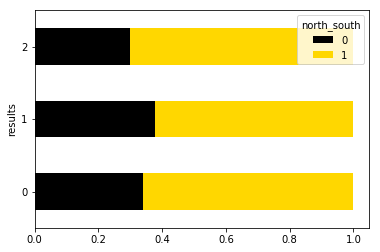

In [61]:
results_count  = pd.crosstab([datos.results], datos.north_south)
results_count.div(results_count.sum(1).astype(float), axis=0).plot.barh(stacked=True, color=['black','gold'])

~Expliación~

In [26]:
datos.region.value_counts()

4    4079
0    3736
3    2647
2    2554
5    1334
1    1281
6    1139
8    1133
7     804
Name: region, dtype: int64

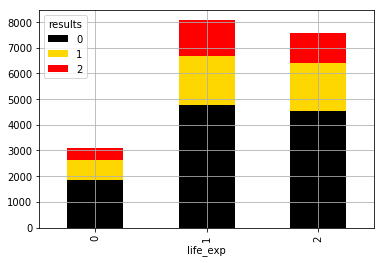

In [55]:
results_count  = pd.crosstab([datos.life_exp], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold', 'red'], grid=True)

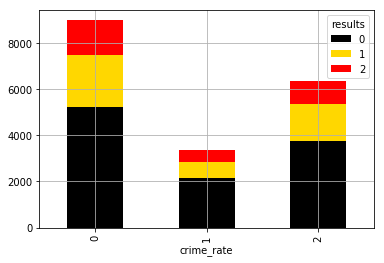

In [57]:
results_count  = pd.crosstab([datos.crime_rate], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold', 'red'], grid=True)

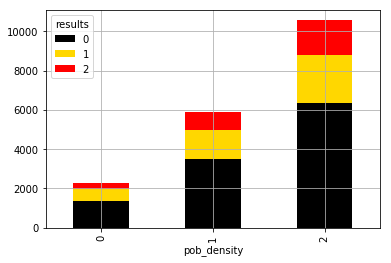

In [58]:
results_count  = pd.crosstab([datos.pob_density], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold', 'red'], grid=True)

In [ ]:
datos.loc[datos.facility_type.str.contains("Restaurant", na = False), 'facility_type'] = 0
datos.loc[datos.facility_type.str.contains( "Grocery Store", na = False), 'facility_type'] = 1
datos.loc[datos.facility_type.str.contains("School", na = False), 'facility_type'] = 2
datos.loc[datos.facility_type.str.contains("Bakery", na = False), 'facility_type'] = 3
datos.loc[datos.facility_type.str.contains("Children's Services Facility", na = False), 'facility_type'] = 4
#datos.loc[datos.facility_type.str.contains("Daycare (2 - 6 Years)", na = False), 'facility_type'] = 5
datos.loc[datos.facility_type.str.contains("Daycare Above and Under 2 Years", na = False), 'facility_type'] = 6
datos.loc[datos.facility_type.str.contains("Catering", na = False), 'facility_type'] = 7
datos.loc[datos.facility_type.str.contains("Hospital", na = False), 'facility_type'] = 8
datos.loc[datos.facility_type.str.contains("Golden Diner", na = False), 'facility_type'] = 9
datos.head()

~Explicación~

In [ ]:
datos.loc[datos.risk.str.contains("Risk 1", na = False), 'risk'] = 0
datos.loc[datos.risk.str.contains("Risk 2", na = False ), 'risk'] = 1
datos.loc[datos.risk.str.contains("Risk 3", na = False), 'risk'] = 2
datos.head()

~Explicación~

In [48]:
datos.loc[datos.results.str.contains("Condition", na = False), 'results'] = 2
datos.loc[datos.results.str.contains("Pass", na = False), 'results'] = 0
datos.loc[datos.results.str.contains("Fail", na = False ), 'results'] = 1
datos.head()

,dba_name,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,north_south,community,life_exp,crime_rate,pob_density
0,bz mart,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,60609.0,2014-01-17T00:00:00,License Re-Inspection,0,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)",0,5,1,2,1
2,subway,Restaurant,Risk 1 (High),51 W 79TH ST,60620.0,2014-01-16T00:00:00,Canvass,0,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)",0,7,0,1,1
3,milwaukee fresh market,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,60647.0,2014-01-16T00:00:00,Complaint,0,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)",1,2,2,1,2
5,subway,Restaurant,Risk 1 (High),1100 W TAYLOR ST,60607.0,2014-01-16T00:00:00,Complaint,2,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)",0,4,1,0,2
6,chop suey kitchen,Restaurant,Risk 1 (High),5353 W MADISON ST,60644.0,2014-01-16T00:00:00,Canvass,0,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.880205,-87.759586,"(41.880205089634494, -87.75958648612682)",1,3,1,0,2
